<a href="https://colab.research.google.com/github/catastropiyush/coursework-notebooks/blob/main/XRD_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
The monoclinic unit cell of M-TSC has the following parameters: a = 8.1426(3) Å, b = 3.97730(10) Å, c = 17.8652(6) Å, β = 102.137(3)°, Z = 2. The fractional coordinates of the contents of the unit cell are

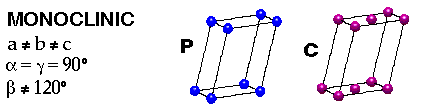

In [15]:
import numpy as np
from scipy.constants import N_A  # Avogadro's number
# Given parameters for the monoclinic unit cell
a     = 8.1426   # Å
b     = 3.9773   # Å
c     = 17.8652  # Å
alpha = 90.00   * np.pi/180  # Convert to radians
gamma = 90.00   * np.pi/180  # Convert to radians
beta  = 102.137 * np.pi/180  # Convert to radians
Z     = 2                       # Formula units per unit cell

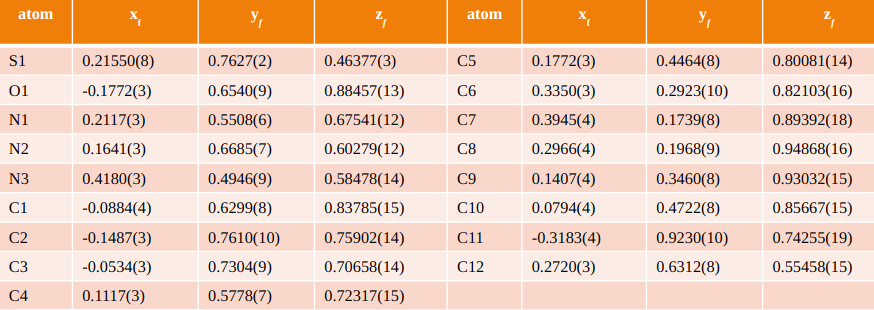

In [2]:
# Fractional coordinates from the table
atoms = {
    'S1':  np.array([0.21550, 0.7627, 0.46377]),
    'O1':  np.array([-0.1772, 0.6540, 0.88457]),
    'N1':  np.array([0.2117, 0.5508, 0.67541]),
    'N2':  np.array([0.1641, 0.6685, 0.60279]),
    'N3':  np.array([0.4180, 0.4946, 0.58478]),
    'C1':  np.array([-0.0884, 0.6299, 0.83785]),
    'C2':  np.array([-0.1487, 0.7610, 0.75902]),
    'C3':  np.array([-0.0534, 0.7304, 0.70658]),
    'C4':  np.array([0.1117, 0.5778, 0.72317]),
    'C5':  np.array([0.1772, 0.4464, 0.80081]),
    'C6':  np.array([0.3350, 0.2923, 0.82103]),
    'C7':  np.array([0.3945, 0.1739, 0.89392]),
    'C8':  np.array([0.2966, 0.1968, 0.94868]),
    'C9':  np.array([0.1407, 0.3460, 0.93032]),
    'C10': np.array([0.0794, 0.4722, 0.85667]),
    'C11': np.array([-0.3183, 0.9230, 0.74255]),
    'C12': np.array([0.2720, 0.6312, 0.55458])
}

In [3]:
atoms

{'S1': array([0.2155 , 0.7627 , 0.46377]),
 'O1': array([-0.1772 ,  0.654  ,  0.88457]),
 'N1': array([0.2117 , 0.5508 , 0.67541]),
 'N2': array([0.1641 , 0.6685 , 0.60279]),
 'N3': array([0.418  , 0.4946 , 0.58478]),
 'C1': array([-0.0884 ,  0.6299 ,  0.83785]),
 'C2': array([-0.1487 ,  0.761  ,  0.75902]),
 'C3': array([-0.0534 ,  0.7304 ,  0.70658]),
 'C4': array([0.1117 , 0.5778 , 0.72317]),
 'C5': array([0.1772 , 0.4464 , 0.80081]),
 'C6': array([0.335  , 0.2923 , 0.82103]),
 'C7': array([0.3945 , 0.1739 , 0.89392]),
 'C8': array([0.2966 , 0.1968 , 0.94868]),
 'C9': array([0.1407 , 0.346  , 0.93032]),
 'C10': array([0.0794 , 0.4722 , 0.85667]),
 'C11': array([-0.3183 ,  0.923  ,  0.74255]),
 'C12': array([0.272  , 0.6312 , 0.55458])}

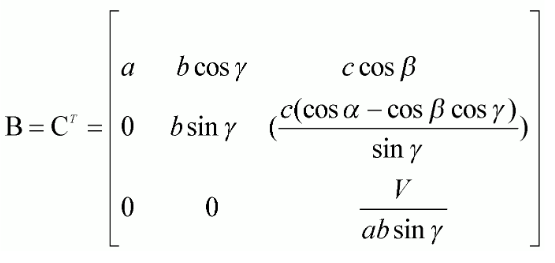

In [ ]:
# Function to create the transformation matrix for monoclinic system
def create_transformation_matrix(a, b, c, beta):
    """Create transformation matrix for monoclinic system."""
    # For monoclinic system, alpha = gamma = 90°, only beta varies
    M = np.array([
        [a, 0, 0],
        [0, b, 0],
        [c * np.cos(beta), 0, c * np.sin(beta)]
    ])
    return M

In [16]:
T = c*(np.cos(alpha)- np.cos(beta)*np.cos(gamma))/(np.sin(gamma))
print(T)

1.3239263005229395e-15


In [18]:
M = np.array([
        [a               , b*np.cos(gamma) , c* np.cos(beta) ],
        [0               , b*np.sin(gamma) , T               ],
        [0               , 0               , c * np.sin(beta)]
      ])
print(M)

[[ 8.14260000e+00  2.43539386e-16 -3.75615730e+00]
 [ 0.00000000e+00  3.97730000e+00  1.32392630e-15]
 [ 0.00000000e+00  0.00000000e+00  1.74658711e+01]]


In [23]:
# Function to create the transformation matrix for monoclinic system
def create_transformation_matrix(a, b, c, alpha, beta, gamma):
    """Create transformation matrix for monoclinic system."""
    # For monoclinic system, alpha = gamma = 90°, only beta varies
    M = np.array([
        [a               , b*np.cos(gamma) , c* np.cos(beta) ],
        [0               , b*np.sin(gamma) , T               ],
        [0               , 0               , c * np.sin(beta)]
      ])
    print(M)

In [24]:
create_transformation_matrix(a, b, c, alpha, beta, gamma)

[[ 8.14260000e+00  2.43539386e-16 -3.75615730e+00]
 [ 0.00000000e+00  3.97730000e+00  1.32392630e-15]
 [ 0.00000000e+00  0.00000000e+00  1.74658711e+01]]


In [25]:
def calculate_distance(atom1_frac, atom2_frac, M):
    """Calculate distance between two atoms given their fractional coordinates."""
    # Calculate the displacement vector in fractional coordinates
    delta_frac = atom1_frac - atom2_frac

    # Transform to Cartesian coordinates
    delta_cart = delta_frac @ M

    # Calculate the distance (magnitude of the vector)
    distance = np.sqrt(np.dot(delta_cart, delta_cart))

    return distance

In [9]:
np.sin(np.array((90.0,102.137)) * np.pi / 180. )

array([1.        , 0.97764767])

In [10]:
np.cos(np.array((90.0,102.137)) * np.pi / 180. )

array([ 6.12323400e-17, -2.10249944e-01])

In [29]:
# Function to calculate distance between atoms
def calculate_distance(atom1_frac, atom2_frac, M):
    """Calculate distance between two atoms given their fractional coordinates."""
    # Calculate the displacement vector in fractional coordinates
    delta_frac = atom1_frac - atom2_frac

    # Transform to Cartesian coordinates
    delta_cart = delta_frac @ M

    # Calculate the distance (magnitude of the vector)
    distance = np.sqrt(np.dot(delta_cart, delta_cart))

    return distance

In [31]:
def part_a():
    print("\n(a) Determine distances between specified atom pairs:")
    # Create transformation matrix
    M = create_transformation_matrix(a, b, c, alpha, beta, gamma)

    # Calculate N1-N2 distance
    d_N1_N2 = calculate_distance(atoms['N1'], atoms['N2'], M)
    print(f"   Distance N1-N2: {d_N1_N2:.4f} Å")

    # Calculate C1-O1 distance
    d_C1_O1 = calculate_distance(atoms['C1'], atoms['O1'], M)
    print(f"   Distance C1-O1: {d_C1_O1:.4f} Å")

    # Calculate C12-S1 distance
    d_C12_S1 = calculate_distance(atoms['C12'], atoms['S1'], M)
    print(f"   Distance C12-S1: {d_C12_S1:.4f} Å")

In [50]:
import numpy as np
from scipy.constants import N_A  # Avogadro's number

a    = 8.1426   # Å
b    = 3.9773   # Å
c    = 17.8652  # Å
beta = 102.137 * np.pi/180  # Convert to radians
Z    = 2        # Formula units per unit cell

# Fractional coordinates from the table
atoms = {
    'S1':  np.array([0.21550, 0.7627, 0.46377]),
    'O1':  np.array([-0.1772, 0.6540, 0.88457]),
    'N1':  np.array([0.2117, 0.5508, 0.67541]),
    'N2':  np.array([0.1641, 0.6685, 0.60279]),
    'N3':  np.array([0.4180, 0.4946, 0.58478]),
    'C1':  np.array([-0.0884, 0.6299, 0.83785]),
    'C2':  np.array([-0.1487, 0.7610, 0.75902]),
    'C3':  np.array([-0.0534, 0.7304, 0.70658]),
    'C4':  np.array([0.1117, 0.5778, 0.72317]),
    'C5':  np.array([0.1772, 0.4464, 0.80081]),
    'C6':  np.array([0.3350, 0.2923, 0.82103]),
    'C7':  np.array([0.3945, 0.1739, 0.89392]),
    'C8':  np.array([0.2966, 0.1968, 0.94868]),
    'C9':  np.array([0.1407, 0.3460, 0.93032]),
    'C10': np.array([0.0794, 0.4722, 0.85667]),
    'C11': np.array([-0.3183, 0.9230, 0.74255]),
    'C12': np.array([0.2720, 0.6312, 0.55458])
}

def create_transformation_matrix(a, b, c, alpha, beta, gamma):
    """Create transformation matrix for monoclinic system."""
    # For monoclinic system, alpha = gamma = 90°, only beta varies
    M = np.array([
        [a               , 0               , c* np.cos(beta) ],
        [0               , b               , 0               ],
        [0               , 0               , c * np.sin(beta)]
      ])

    return M


# Function to calculate distance between atoms
def calculate_distance(atom1_frac, atom2_frac, M):
    """Calculate distance between two atoms given their fractional coordinates."""
    delta_frac = atom1_frac - atom2_frac
    delta_cart = M @ delta_frac
    # Calculate the distance (magnitude of the vector)
    distance = np.sqrt(np.dot(delta_cart, delta_cart))
    return distance

# Function to calculate unit cell volume
def calculate_volume(a, b, c, beta):
    """Calculate volume of monoclinic unit cell."""
    volume = a * b * c * np.sin(beta)
    return volume

# (a) Determine distances between atom pairs
def part_a():
    print("\n(a) Determine distances between specified atom pairs:")

    # Create transformation matrix
    M = create_transformation_matrix(a, b, c, alpha, beta, gamma)
    # Calculate N1-N2 distance
    d_N1_N2 = calculate_distance(atoms['N1'], atoms['N2'], M)
    print(f"   Distance N1-N2: {d_N1_N2:.4f} Å")
    # Calculate C1-O1 distance
    d_C1_O1 = calculate_distance(atoms['C1'], atoms['O1'], M)
    print(f"   Distance C1-O1: {d_C1_O1:.4f} Å")
    # Calculate C12-S1 distance
    d_C12_S1 = calculate_distance(atoms['C12'], atoms['S1'], M)
    print(f"   Distance C12-S1: {d_C12_S1:.4f} Å")

# (b) Determine the volume of the unit cell
def part_b():
    volume = calculate_volume(a, b, c, beta)
    print(f"\n(b) Volume of the unit cell: {volume:.4f} Å³")
    return volume

# (c) Determine the mass of the unit cell in grams
def part_c(volume):
    atomic_masses = {
        'C': 12.0107,
        'H': 1.00794,
        'N': 14.0067,
        'O': 15.9994,
        'S': 32.065
    }
    # Calculate molar mass of one M-TSC molecule
    molar_mass = 12 * atomic_masses['C'] + 12 * atomic_masses['H'] + \
                 3 * atomic_masses['N'] + 1 * atomic_masses['O'] + \
                 1 * atomic_masses['S']

    print(f"\n(c) Determine the mass of the unit cell:")
    print(f"   Molecular formula: C12 H12 N3 O1 S1")
    print(f"   Molar mass: {molar_mass:.4f} g/mol")

    # Mass of one molecule
    mass_molecule = molar_mass / N_A  # in grams
    # Mass of unit cell (Z = 2 molecules per unit cell)
    mass_unit_cell = Z * mass_molecule
    print(f"   Mass of unit cell: {mass_unit_cell:.4e} g")
    return mass_unit_cell

# (d) Determine the density of crystal in g/cm³
def part_d(mass_unit_cell, volume):
    # Convert volume from Å³ to cm³
    volume_cm3 = volume * 1e-24  # 1 Å³ = 10^-24 cm³
    # Calculate density
    density = mass_unit_cell / volume_cm3  # g/cm³
    print(f"\n(d) Density of crystal:")
    print(f"   Density: {density:.4f} g/cm³")

# Execute all parts
print("M-TSC Crystallographic Analysis")
print("==============================")
print(f"Unit cell parameters: a = {a} Å, b = {b} Å, c = {c} Å, β = {beta*180/np.pi}°, Z = {Z}")

part_a()
volume = part_b()
mass = part_c(volume)
part_d(mass, volume)

M-TSC Crystallographic Analysis
Unit cell parameters: a = 8.1426 Å, b = 3.9773 Å, c = 17.8652 Å, β = 102.137°, Z = 2

(a) Determine distances between specified atom pairs:
   Distance N1-N2: 1.3569 Å
   Distance C1-O1: 1.2176 Å
   Distance C12-S1: 1.6743 Å

(b) Volume of the unit cell: 565.6421 Å³

(c) Determine the mass of the unit cell:
   Molecular formula: C12 H12 N3 O1 S1
   Molar mass: 246.3082 g/mol
   Mass of unit cell: 8.1801e-22 g

(d) Density of crystal:
   Density: 1.4462 g/cm³


In [51]:
import numpy as np
alpha = 90 * np.pi/180
gamma = 90 * np.pi/180

for atom_name, atom_frac in atoms.items():
    cartesian_coordinates = M@atom_frac
    print(f"{atom_name}: {cartesian_coordinates}")

S1: [0.01273723 3.03348671 8.10014704]
O1: [-4.76545278  2.6011542  15.4497856 ]
N1: [-0.81315778  2.19069684 11.796624  ]
N2: [-0.9279734   2.65882505 10.52825244]
N3: [ 1.20708113  1.96717258 10.2136921 ]
C1: [-3.86690223  2.50530127 14.6337801 ]
C2: [-4.06180313  3.0267253  13.25694548]
C3: [-3.08884046  2.90501992 12.3410352 ]
C4: [-1.80681185  2.29808394 12.63079401]
C5: [-1.56509961  1.77546672 13.98684424]
C6: [-0.35614683  1.16256479 14.34000415]
C7: [-0.14544843  0.69165247 15.6130915 ]
C8: [-1.14829615  0.78273264 16.5695226 ]
C9: [-2.34876444  1.3761458  16.2488492 ]
C10: [-2.57126483  1.87808106 14.9624878 ]
C11: [-5.38092418  3.6710479  12.96928259]
C12: [0.13169748 2.51047176 9.6862228 ]


In [53]:
import numpy as np
def calculate_distance_between_vectors(vector1, vector2):

  return np.linalg.norm(vector1 - vector2)

# Example usage
vector1 = np.array([-0.81315778 ,2.19069684,11.796624 ])
vector2 = np.array([-0.9279734 ,2.65882505,10.52825244])

distance = calculate_distance_between_vectors(vector1, vector2)
print("Distance between the two vectors:", distance)


Distance between the two vectors: 1.3568688447343105
